In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
#Importing dataset
data=pd.read_csv("bank-full.csv",sep=';')

In [3]:
data.shape #Data contains 45211 rows and 17 columns 

(45211, 17)

In [4]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


#Data PreProcessing




##Removing NULL Values

In [5]:
data = data.replace('unknown', np.nan)
data=data.replace('other',np.nan)
data.isna().sum() 

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     38799
y                0
dtype: int64

In [6]:
data.drop('contact', inplace=True, axis=1) #dropping as it has too many NULL values
data.drop('poutcome', inplace=True, axis=1) #dropping as it has too many NULL values
data.drop('duration',inplace=True, axis=1) #dropping as the value of the variable will only be known at the end of the call. Hence, at that time we will also know the outcome of the call.
data=data.dropna()


##Upscaling the dataset

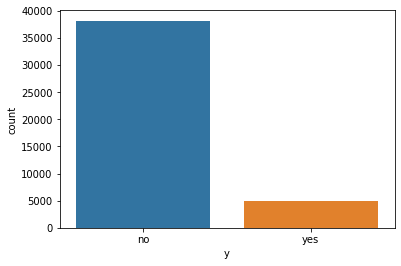

In [7]:
sns.countplot(x='y',data=data) #we can see that the data is imbalanced

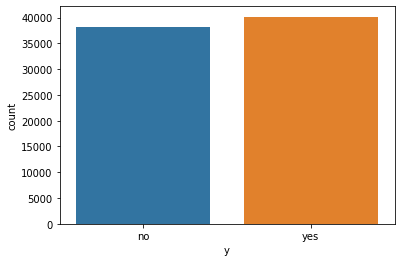

In [8]:
d1=data.copy()
d2=d1[d1.y=='yes']
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
data=d1
sns.countplot(x='y',data=data)


##Correlation Plot

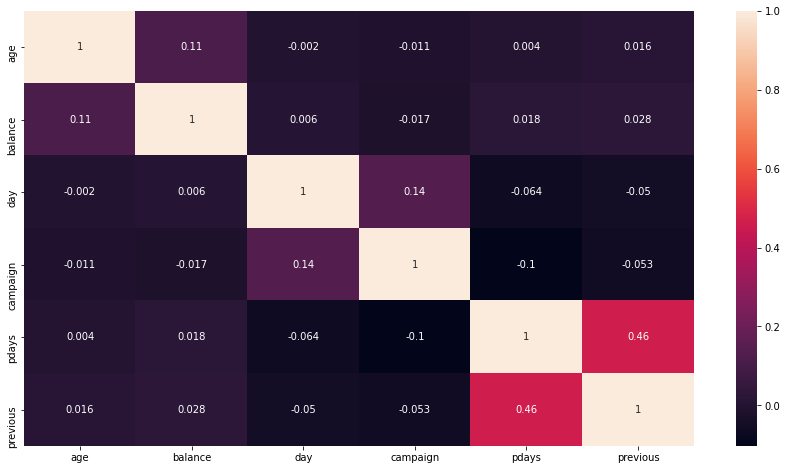

In [9]:
corrdata = data.corr()
ax,fig = plt.subplots(figsize=(15,8))
sns.heatmap(corrdata,annot=True)

##Handling Categorical Variables

In [10]:
#Ordinal variables
data['default'] = data['default'].map({'yes': -1,'no': 0})
data['housing'] = data['housing'].map({'yes': 1,'no': 0})
data['loan'] = data['loan'].map({'yes': 1,'no': 0})

In [11]:
#Nominal Variables
nominal = ['job','marital','education','month',]
dataProcessed = pd.get_dummies(data,columns=nominal)
dataProcessed['y']=dataProcessed['y'].map({'yes': 1,'no': 0})

In [12]:
data=dataProcessed
data.head() #all values have been coverted to numerical values 

,age,default,balance,housing,loan,day,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,0,2143,1,0,5,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,44,0,29,1,0,5,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,33,0,2,1,1,5,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
5,35,0,231,1,0,5,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
6,28,0,447,1,1,5,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [13]:
data.shape #43172 rows and 39 columns

(78340, 39)

# Model Building 


##Splitting into training and testing data 

In [14]:
Y=data["y"]
data.drop('y', inplace=True, axis=1)
data = pd.concat([data,Y],axis=1)

In [15]:
from sklearn.model_selection import train_test_split
trainX,testX,trainY,testY=train_test_split(data.iloc[:,:-1],data.iloc[:,-1],train_size=0.8,random_state=1)

In [16]:
trainX.head()

,age,default,balance,housing,loan,day,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
20834,30,0,0,1,0,13,4,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
23260,56,0,297,0,1,27,16,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4720,49,0,0,1,0,20,2,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
44475,37,0,4596,1,0,6,1,91,6,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
33968,35,0,193,1,0,30,1,13,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0


## Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(trainX,trainY)
pred=model.predict(testX)

In [18]:
from sklearn.metrics import classification_report,confusion_matrix
cm1=(confusion_matrix(testY,pred))

print('Confusion Matrix : \n', cm1)
total1=sum(sum(cm1))

accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Confusion Matrix : 
 [[7279  420]
 [   0 7969]]
Accuracy :  0.9731937707429155
Sensitivity :  0.9454474607091831
Specificity :  1.0


In [19]:
print(classification_report(pred,testY))


              precision    recall  f1-score   support

           0       0.95      1.00      0.97      7279
           1       1.00      0.95      0.97      8389

    accuracy                           0.97     15668
   macro avg       0.97      0.97      0.97     15668
weighted avg       0.97      0.97      0.97     15668



In [20]:
import sklearn.metrics as metrics
#AUC
randomforestauc = metrics.roc_auc_score(testY , pred)
randomforestauc

0.9727237303545915

## Support Vector Classifier

In [21]:
#Normalizing the data
from keras.utils import normalize
Xtrain=normalize(trainX)
Xtest=normalize(testX)

In [22]:
from sklearn.svm import SVC
model=SVC(gamma=0.8,degree=0.8,max_iter=10000)
model.fit(Xtrain,trainY)
pred=model.predict(Xtest)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [23]:
cm1=(confusion_matrix(testY,pred))
print('Confusion Matrix : \n', cm1)
total1=sum(sum(cm1))

accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Confusion Matrix : 
 [[1994 5705]
 [1394 6575]]
Accuracy :  0.5469109011998979
Sensitivity :  0.25899467463306924
Specificity :  0.8250721545990714


In [24]:
print(classification_report(pred,testY))


              precision    recall  f1-score   support

           0       0.26      0.59      0.36      3388
           1       0.83      0.54      0.65     12280

    accuracy                           0.55     15668
   macro avg       0.54      0.56      0.50     15668
weighted avg       0.70      0.55      0.59     15668



In [25]:
import sklearn.metrics as metrics
#AUC
supportVectorMachineauc = metrics.roc_auc_score(testY , pred)
supportVectorMachineauc

0.5420334146160704

## Artificial Neural Network

In [26]:
pip install tensorflow==2.2

In [27]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.utils import normalize

In [28]:
#Normalizing the data
from keras.utils import normalize
Xtrain=normalize(trainX)
Xtest=normalize(testX)

In [29]:
# Defining the model
tf.keras.backend.set_floatx('float64')
model=keras.models.Sequential()
#model.add(keras.layers.Flatten()) #Flattens the input
model.add(keras.layers.Dense(39,activation=tf.nn.relu)) #Adding input layer with 128 neurons and relu activation func
model.add(keras.layers.Dense(39,activation=tf.nn.relu))
model.add(keras.layers.Dense(2,activation=tf.nn.softmax))
# Adam Optimiser converges faster than any other existing optimizer
# sparse categorical crossentropy combines the good of crossentropy and one hot encoding
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [30]:
model.fit(Xtrain,trainY,epochs=100)


Epoch 1/100
1959/1959 [==============================] - 4s 2ms/step - loss: 0.6596 - accuracy: 0.6010
Epoch 2/100
1959/1959 [==============================] - 3s 2ms/step - loss: 0.6427 - accuracy: 0.6255
Epoch 3/100
1959/1959 [==============================] - 3s 2ms/step - loss: 0.6348 - accuracy: 0.6373
Epoch 4/100
1959/1959 [==============================] - 3s 1ms/step - loss: 0.6298 - accuracy: 0.6434
Epoch 5/100
1959/1959 [==============================] - 3s 1ms/step - loss: 0.6229 - accuracy: 0.6530
Epoch 6/100
1959/1959 [==============================] - 3s 1ms/step - loss: 0.6174 - accuracy: 0.6581
Epoch 7/100
1959/1959 [==============================] - 3s 1ms/step - loss: 0.6128 - accuracy: 0.6631
Epoch 8/100
1959/1959 [==============================] - 3s 2ms/step - loss: 0.6074 - accuracy: 0.6691
Epoch 9/100
1959/1959 [==============================] - 3s 1ms/step - loss: 0.6060 - accuracy: 0.6680
Epoch 10/100
1959/1959 [==============================] - 3s 1ms/step - l

In [31]:
predY = model.predict(Xtest)
y_pred_class = np.argmax(predY,axis=1)

In [32]:
from sklearn.metrics import classification_report,confusion_matrix
cm1=(confusion_matrix(testY,y_pred_class))
print('Confusion Matrix : \n', cm1)
total1=sum(sum(cm1))

accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Confusion Matrix : 
 [[5204 2495]
 [1994 5975]]
Accuracy :  0.7134924687260659
Sensitivity :  0.6759319392128847
Specificity :  0.7497803990463044


In [33]:
print(classification_report(testY,y_pred_class))

              precision    recall  f1-score   support

           0       0.72      0.68      0.70      7699
           1       0.71      0.75      0.73      7969

    accuracy                           0.71     15668
   macro avg       0.71      0.71      0.71     15668
weighted avg       0.71      0.71      0.71     15668



In [34]:
import sklearn.metrics as metrics
#AUC
artificialNeuralNetworkauc = metrics.roc_auc_score(testY , y_pred_class)
artificialNeuralNetworkauc

0.7128561691295946

## Probabilistic Neural Network

In [36]:
!pip install neupy

     |████████████████████████████████| 235kB 8.6MB/s 
     |████████████████████████████████| 92.6MB 91kB/s 
     |████████████████████████████████| 51kB 6.6MB/s 
     |████████████████████████████████| 368kB 43.7MB/s 
     |████████████████████████████████| 3.2MB 43.9MB/s 
  Found existing installation: progressbar2 3.38.0
    Uninstalling progressbar2-3.38.0:
      Successfully uninstalled progressbar2-3.38.0
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: tensorboard 2.2.2
    Uninstalling tensorboard-2.2.2:
      Successfully uninstalled tensorboard-2.2.2
  Found existing installation: tensorflow 2.2.0
    Uninstalling tensorflow-2.2.0:
      Successfully uninstalled tensorflow-2.2.0
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [38]:
from neupy import algorithms
from sklearn import metrics

In [39]:
pnn = algorithms.PNN(std=10,verbose=True)
pnn.train(Xtrain,trainY)


Main information

[ALGORITHM] PNN

[OPTION] batch_size = 128
[OPTION] std = 10
[OPTION] verbose = True



In [40]:
pred=pnn.predict(Xtest)
prob=pnn.predict_proba(Xtest)
print(pred)

Time: 0:05:18 | 99%|########################################### | ETA:  0:00:02

[1 1 1 ... 1 1 0]


In [41]:
y_pred = pnn.predict(testX)

In [42]:
from sklearn.metrics import classification_report,confusion_matrix
cm1=(confusion_matrix(testY,y_pred))
print('Confusion Matrix : \n', cm1)
total1=sum(sum(cm1))

accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Confusion Matrix : 
 [[6347 1352]
 [6734 1235]]
Accuracy :  0.4839162624457493
Sensitivity :  0.8243927782828939
Specificity :  0.15497553017944535


In [43]:
print(classification_report(testY,y_pred))

              precision    recall  f1-score   support

           0       0.49      0.82      0.61      7699
           1       0.48      0.15      0.23      7969

    accuracy                           0.48     15668
   macro avg       0.48      0.49      0.42     15668
weighted avg       0.48      0.48      0.42     15668



In [44]:
import sklearn.metrics as metrics
#AUC
probablisticNeuralNetworkauc = metrics.roc_auc_score(testY , y_pred)
probablisticNeuralNetworkauc

0.4896841542311696

**Comparing all the auc scores:**

In [45]:
print('random forest', randomforestauc)
print('Support Vector Machines', supportVectorMachineauc)
print('Artificial Neural Network', artificialNeuralNetworkauc)
print('Probablistic Neural Network', probablisticNeuralNetworkauc)

random forest 0.9727237303545915
Support Vector Machines 0.5420334146160704
Artificial Neural Network 0.7128561691295946
Probablistic Neural Network 0.4896841542311696


In [46]:
print('best result is:' )
print(max(randomforestauc, supportVectorMachineauc, artificialNeuralNetworkauc, probablisticNeuralNetworkauc))

best result is:
0.9727237303545915
